<a href="https://colab.research.google.com/github/SahaRahul/Ant-Colony-Optimization-and-Graphviz/blob/main/Shortest_path_finding_Algorithms_Ant_Colony_optimization%2C_Dijkstra%2C_Christofides_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install aco-routing
%pip install yfiles-jupyter-graphs
%pip install networkx
%pip install matplotlib
%pip install graphviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 43.1 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [2]:
from aco_routing import ACO
import networkx as nx
from yfiles_jupyter_graphs import GraphWidget


In [62]:
G = nx.DiGraph()

G.add_edge("A", "B", cost=2)
G.add_edge("B", "C", cost=2)
G.add_edge("A", "H", cost=2)
G.add_edge("H", "G", cost=2)
G.add_edge("C", "F", cost=1)
G.add_edge("F", "G", cost=1)
G.add_edge("G", "F", cost=1)
G.add_edge("F", "C", cost=1)
G.add_edge("C", "D", cost=10)
G.add_edge("E", "D", cost=2)
G.add_edge("G", "E", cost=2)

In [63]:
from networkx import path_graph
from networkx.drawing.nx_pydot import to_pydot

# G = path_graph(4)
dot = to_pydot(G).to_string()
print(dot)

strict digraph {
A;
B;
C;
H;
G;
F;
D;
E;
A -> B [cost=2];
A -> H [cost=2];
B -> C [cost=2];
C -> F [cost=1];
C -> D [cost=10];
H -> G [cost=2];
G -> F [cost=1];
G -> E [cost=2];
F -> G [cost=1];
F -> C [cost=1];
E -> D [cost=2];
}



In [5]:
from graphviz import Source
src = Source(dot) # dot is string containing DOT notation of graph
src.view()

'Source.gv.pdf'

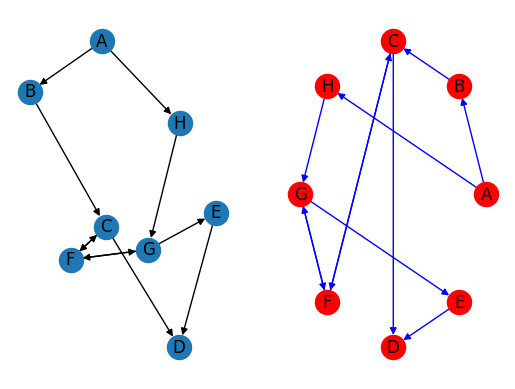

In [6]:
import matplotlib.pyplot as plt
# G = nx.cubical_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True)   # default spring_layout
subax2 = plt.subplot(122)
nx.draw(G, pos=nx.circular_layout(G), node_color='r', edge_color='b', with_labels=True)
plt.show()

In [7]:
w = GraphWidget()
w.import_graph(G)
w.directed = True

In [8]:
try:
  import google.colab
  from google.colab import output
  output.enable_custom_widget_manager()
except:
  pass

In [9]:
display(w)

GraphWidget(layout=Layout(height='500px', width='100%'))

### Ant Colony Optimization: Find Shortest path

In [84]:
aco = ACO(G, ant_max_steps=100, num_iterations=100, ant_random_spawn=True)

aco_path, aco_cost = aco.find_shortest_path(
    source="A",
    destination="G",
    num_ants=100,
)

print(aco_path, aco_cost)

edge_list = [(aco_path[i-1],aco_path[i]) for i in range(1,len(aco_path))]
print(edge_list)

['A', 'H', 'G'] 4.0
[('A', 'H'), ('H', 'G')]


In [77]:
G.edges

OutEdgeView([('A', 'B'), ('A', 'H'), ('B', 'C'), ('C', 'F'), ('C', 'D'), ('H', 'G'), ('G', 'F'), ('G', 'E'), ('F', 'G'), ('F', 'C'), ('E', 'D')])

In [78]:
G.edges(data=True)

OutEdgeDataView([('A', 'B', {'cost': 2, 'pheromones': 644.500000000007}), ('A', 'H', {'cost': 2, 'pheromones': 720.4000000000086}), ('B', 'C', {'cost': 2, 'pheromones': 2194.7999999999706}), ('C', 'F', {'cost': 1, 'pheromones': 4541.299999999932}), ('C', 'D', {'cost': 10, 'pheromones': 1.0}), ('H', 'G', {'cost': 2, 'pheromones': 2253.4333333332943}), ('G', 'F', {'cost': 1, 'pheromones': 4647.433333333255}), ('G', 'E', {'cost': 2, 'pheromones': 1.0}), ('F', 'G', {'cost': 1, 'pheromones': 1.0}), ('F', 'C', {'cost': 1, 'pheromones': 1.0}), ('E', 'D', {'cost': 2, 'pheromones': 1.0})])

In [79]:
G.nodes

NodeView(('A', 'B', 'C', 'H', 'G', 'F', 'D', 'E'))

In [80]:
G.nodes(data=True)

NodeDataView({'A': {}, 'B': {}, 'C': {}, 'H': {}, 'G': {}, 'F': {}, 'D': {}, 'E': {}})

In [81]:
nx.path_weight(G, ['A','H'], "cost")

2

### Alternative Algorithm: Dijkstra Shortest Part Finding

In [85]:
source = "A"
destination = "G"

dijkstra_path = nx.dijkstra_path(G, source, destination)
dijkstra_cost = nx.path_weight(G, dijkstra_path, "cost")

In [86]:
dijkstra_path, dijkstra_cost

(['A', 'H', 'G'], 4)

In [87]:
G.nodes()

NodeView(('A', 'B', 'C', 'H', 'G', 'F', 'D', 'E'))

In [88]:
G = nx.random_geometric_graph(G, radius=0.4, seed=3)

pos = nx.get_node_attributes(G, "pos")

# Depot should be at (0,0)
pos[0] = (0.5, 0.5)

In [89]:
pos

{'A': [0.23796462709189137, 0.5442292252959519],
 'B': [0.36995516654807925, 0.6039200385961945],
 'C': [0.625720304108054, 0.06552885923981311],
 'H': [0.013167991554874137, 0.83746908209646],
 'G': [0.25935401432800764, 0.23433096104669637],
 'F': [0.9956448355104628, 0.47026350752244794],
 'D': [0.8364614512743888, 0.47635320869933495],
 'E': [0.6390681405441619, 0.15061642402352393],
 0: (0.5, 0.5)}

In [90]:
H = G.copy()

The route of the traveller is:


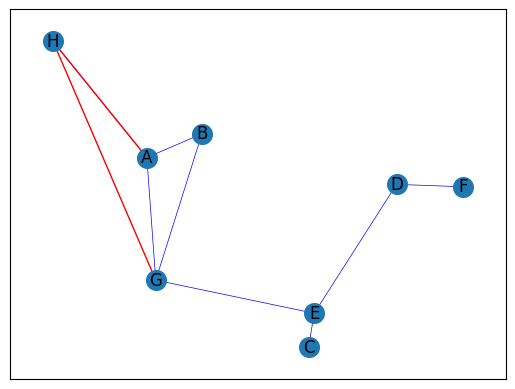

In [91]:
# Draw closest edges on each node only
nx.draw_networkx_edges(H, pos, edge_color="blue", width=0.5)

# Draw the route
nx.draw_networkx(
    G,
    pos,
    with_labels=True,
    edgelist=edge_list,
    edge_color="red",
    node_size=200,
    width=1,
)

print("The route of the traveller is:")
plt.show()

Improve the Graphical Visualization part

In [18]:
w = GraphWidget()
w.import_graph(G)
w.directed = True

In [19]:
node_dict = dict()

for i in range(0,len(list(G.nodes()))):
    print(i)
    node_dict[i]=list(G.nodes())[i]

0
1
2
3
4
5
6
7


In [20]:
node_dict

{0: 'A', 1: 'B', 2: 'C', 3: 'H', 4: 'G', 5: 'F', 6: 'D', 7: 'E'}

In [37]:
def custom_edge_color_mapping(edge):
    """let the edge be purple if the starting node has an even index"""
    print(f"---{edge['start']}")
    print(edge['end'])
    print(f"====== {node_dict[edge['start']]}")
    print(node_dict[edge['end']])

    if node_dict[edge['start']] == 'A' and node_dict[edge['end']] == 'B':
        return "#D6B4FC"
    else:
        return "#15AFAC"

    # return ("#D6B4FC" if int(node_dict[edge['start']]) == 1 and int(node_dict[edge['end']]) == 2 else "#15AFAC")

In [38]:
w2 = GraphWidget(graph=G)
w2.set_edge_color_mapping(custom_edge_color_mapping)
w2.get_edge_color_mapping()

<function __main__.custom_edge_color_mapping(edge)>

In [39]:
display(w2)

---0
1
====== A
B
---0
3
====== A
H
---0
4
====== A
G
---1
4
====== B
G
---2
7
====== C
E
---4
7
====== G
E
---5
6
====== F
D
---6
7
====== D
E


GraphWidget(layout=Layout(height='500px', width='100%'))

### Solving the problem through Adjacency Matrix

In [62]:
import numpy as np
from aco_routing import ACO
import networkx as nx

# Define the distance matrix for the TSP
distance_matrix = np.array([
    [0, 200, 28, 15, 47],
    [20, 0, 48, 86, 21],
    [12, 14, 0, 10, 43],
    [50, 8, 10, 0, 12],
    [71, 12, 23, 42, 0]
])

# Define the number of nodes
num_nodes = distance_matrix.shape[0]

In [63]:
# Define the nodes with labels
nodelist = list(str(i) for i in range(num_nodes))

### Converting the Adjacency Matrix to Graph

In [64]:
# Create the graph
graph = nx.from_numpy_array(distance_matrix, nodelist=nodelist, edge_attr='cost')

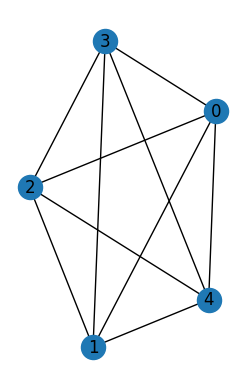

In [66]:
subax1 = plt.subplot(121)
nx.draw(graph, with_labels=True)

### Improve Visualization

In [16]:
from yfiles_jupyter_graphs import GraphWidget

In [17]:
try:
  import google.colab
  from google.colab import output
  output.enable_custom_widget_manager()
except:
  pass

In [69]:
w = GraphWidget()

In [70]:
w.import_graph(graph)
w.directed = True

In [71]:
display(w)

GraphWidget(layout=Layout(height='500px', width='100%'))

In [72]:
# Define the ACO parameters
aco = ACO(graph, ant_max_steps=100, num_iterations=100, ant_random_spawn=True)

# Run the ACO algorithm
best_path, best_cost = aco.find_shortest_path(
    source="1",
    destination="3",
    num_ants=100,
)

# Print the results
print(f"Best path: {best_path}")
print(f"Best cost: {best_cost}")


Best path: ['1', '4', '2', '3']
Best cost: 45.0


### Solving the problem for a large random geometric graph

In [93]:
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.approximation as nx_app
import math

G = nx.random_geometric_graph(20, radius=0.4, seed=3)
pos = nx.get_node_attributes(G, "pos")

print(pos)
# Depot should be at (0,0)
pos[0] = (0.5, 0.5)

H = G.copy()

{0: [0.23796462709189137, 0.5442292252959519], 1: [0.36995516654807925, 0.6039200385961945], 2: [0.625720304108054, 0.06552885923981311], 3: [0.013167991554874137, 0.83746908209646], 4: [0.25935401432800764, 0.23433096104669637], 5: [0.9956448355104628, 0.47026350752244794], 6: [0.8364614512743888, 0.47635320869933495], 7: [0.6390681405441619, 0.15061642402352393], 8: [0.6348606582851885, 0.8680453071432968], 9: [0.5231812103833013, 0.7412518562014903], 10: [0.6714114753695926, 0.0640314382269973], 11: [0.7582302462868173, 0.5910995829313176], 12: [0.3012676595157123, 0.031011751469749993], 13: [0.8655272369789456, 0.47274908866546683], 14: [0.7188239240658031, 0.8788128002554817], 15: [0.7141294836112025, 0.9210986675838745], 16: [0.3949634040007439, 0.8009087709852283], 17: [0.44462105605076063, 0.9355867217045211], 18: [0.8788666603380416, 0.09745430973087721], 19: [0.1359688602006689, 0.21698694123313733]}


In [94]:
pos

{0: (0.5, 0.5),
 1: [0.36995516654807925, 0.6039200385961945],
 2: [0.625720304108054, 0.06552885923981311],
 3: [0.013167991554874137, 0.83746908209646],
 4: [0.25935401432800764, 0.23433096104669637],
 5: [0.9956448355104628, 0.47026350752244794],
 6: [0.8364614512743888, 0.47635320869933495],
 7: [0.6390681405441619, 0.15061642402352393],
 8: [0.6348606582851885, 0.8680453071432968],
 9: [0.5231812103833013, 0.7412518562014903],
 10: [0.6714114753695926, 0.0640314382269973],
 11: [0.7582302462868173, 0.5910995829313176],
 12: [0.3012676595157123, 0.031011751469749993],
 13: [0.8655272369789456, 0.47274908866546683],
 14: [0.7188239240658031, 0.8788128002554817],
 15: [0.7141294836112025, 0.9210986675838745],
 16: [0.3949634040007439, 0.8009087709852283],
 17: [0.44462105605076063, 0.9355867217045211],
 18: [0.8788666603380416, 0.09745430973087721],
 19: [0.1359688602006689, 0.21698694123313733]}

### Another alternative algorithm: Approximate a solution of the traveling salesman problem
Compute a 3/2-approximation of the traveling salesman problem in a complete undirected graph using Christofides algorithm.

The route of the traveller is: [0, 4, 19, 12, 2, 7, 10, 18, 5, 13, 6, 11, 3, 16, 17, 15, 14, 8, 9, 1, 0]


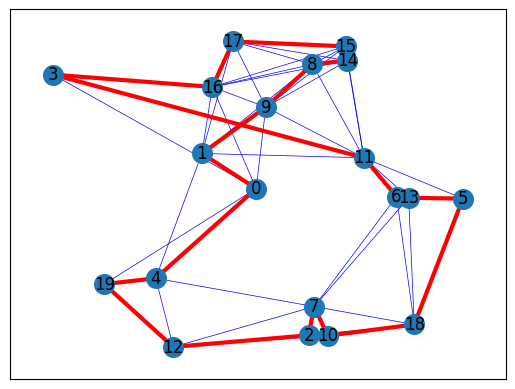

In [95]:

# Calculating the distances between the nodes as edge's weight.
for i in range(len(pos)):
    for j in range(i + 1, len(pos)):
        dist = math.hypot(pos[i][0] - pos[j][0], pos[i][1] - pos[j][1])
        dist = dist

        # This weight in the graph can be any business KPI like actual distance, duration
        G.add_edge(i, j, weight=dist)

cycle = nx_app.christofides(G, weight="weight")
edge_list = list(nx.utils.pairwise(cycle))

# Draw closest edges on each node only
nx.draw_networkx_edges(H, pos, edge_color="blue", width=0.5)

# Draw the route
nx.draw_networkx(
    G,
    pos,
    with_labels=True,
    edgelist=edge_list,
    edge_color="red",
    node_size=200,
    width=3,
)

print("The route of the traveller is:", cycle)
plt.show()

In [96]:
edge_list

[(0, 4),
 (4, 19),
 (19, 12),
 (12, 2),
 (2, 7),
 (7, 10),
 (10, 18),
 (18, 5),
 (5, 13),
 (13, 6),
 (6, 11),
 (11, 3),
 (3, 16),
 (16, 17),
 (17, 15),
 (15, 14),
 (14, 8),
 (8, 9),
 (9, 1),
 (1, 0)]